In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans



In [63]:
data = pd.read_csv('Comprehensive_Banking_Database.csv')

EDA

In [97]:
data.head()

,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5000 non-null   int64  
 1   First Name                         5000 non-null   object 
 2   Last Name                          5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Gender                             5000 non-null   object 
 5   Address                            5000 non-null   object 
 6   City                               5000 non-null   object 
 7   Contact Number                     5000 non-null   int64  
 8   Email                              5000 non-null   object 
 9   Account Type                       5000 non-null   object 
 10  Account Balance                    5000 non-null   float64
 11  Date Of Account Opening            5000 non-null   objec

In [99]:
data.shape



(5000, 40)

In [100]:
data.isnull().sum()

Customer ID                          0
First Name                           0
Last Name                            0
Age                                  0
Gender                               0
Address                              0
City                                 0
Contact Number                       0
Email                                0
Account Type                         0
Account Balance                      0
Date Of Account Opening              0
Last Transaction Date                0
TransactionID                        0
Transaction Date                     0
Transaction Type                     0
Transaction Amount                   0
Account Balance After Transaction    0
Branch ID                            0
Loan ID                              0
Loan Amount                          0
Loan Type                            0
Interest Rate                        0
Loan Term                            0
Approval/Rejection Date              0
Loan Status              

In [101]:
data.columns

Index(['Customer ID', 'First Name', 'Last Name', 'Age', 'Gender', 'Address',
       'City', 'Contact Number', 'Email', 'Account Type', 'Account Balance',
       'Date Of Account Opening', 'Last Transaction Date', 'TransactionID',
       'Transaction Date', 'Transaction Type', 'Transaction Amount',
       'Account Balance After Transaction', 'Branch ID', 'Loan ID',
       'Loan Amount', 'Loan Type', 'Interest Rate', 'Loan Term',
       'Approval/Rejection Date', 'Loan Status', 'CardID', 'Card Type',
       'Credit Limit', 'Credit Card Balance', 'Minimum Payment Due',
       'Payment Due Date', 'Last Credit Card Payment Date', 'Rewards Points',
       'Feedback ID', 'Feedback Date', 'Feedback Type', 'Resolution Status',
       'Resolution Date', 'Anomaly'],
      dtype='object')

In [102]:
data['Address'].unique()

array(['Address_1', 'Address_2', 'Address_3', ..., 'Address_4998',
       'Address_4999', 'Address_5000'], shape=(5000,), dtype=object)

In [103]:
data['Contact Number'].unique()

array([19458794854, 19458794855, 19458794856, ..., 19458799851,
       19458799852, 19458799853], shape=(5000,))

In [104]:
data['Account Type'].unique()

array(['Current', 'Savings'], dtype=object)

In [105]:
data['Transaction Type'].unique()

array(['Withdrawal', 'Deposit', 'Transfer'], dtype=object)

In [106]:
data['Loan Status'].unique()

array(['Rejected', 'Approved', 'Closed'], dtype=object)

In [107]:
data['Resolution Status'].unique()

array(['Resolved', 'Pending'], dtype=object)

In [9]:
data['Loan Term'].unique()

array([36, 24, 48, 12, 60])

In [3]:
data['Feedback Type'].unique()

array(['Suggestion', 'Complaint', 'Praise'], dtype=object)

In [108]:
data['Anomaly'].unique()

array([ 1, -1])

Preprossing

In [4]:
data.shape

(5000, 23)

In [64]:
#feature engeeniring
#Convert to date
date_cols = ['Date Of Account Opening', 'Last Transaction Date', 
             'Transaction Date', 'Approval/Rejection Date',
             'Payment Due Date', 'Last Credit Card Payment Date', 
             'Feedback Date', 'Resolution Date']

for col in date_cols:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

#Account age
data['Account_Age_Days'] = (data['Last Credit Card Payment Date'].max() - data['Date Of Account Opening']).dt.days
#loan age
data['Loan_Age_Days'] =( data['Last Credit Card Payment Date'].max() - data['Approval/Rejection Date']).dt.days
#Days Since Last Credit Payment
data['Days_Since_Last_Credit_Payment'] = (data['Last Credit Card Payment Date'].max() - data['Last Credit Card Payment Date']).dt.days

In [65]:
#credit card
data['Credit_Usage'] = data['Credit Card Balance'] / (data['Credit Limit'] + 1e-5)
data['Balance_to_MinPayment'] = data['Credit Card Balance'] / (data['Minimum Payment Due'] + 1e-5)

In [66]:
#Loan
data['Loan_Utilization'] = data['Loan Amount'] / (data['Account Balance'] + 1e-5)
data['Interest_to_Loan_Ratio'] = data['Interest Rate'] / (data['Loan Amount'] + 1e-5)

In [67]:
#Age group
bins = [18, 25, 35, 50, 70]
labels = ['18-24','25-34','35-49','50-69']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [68]:
#Days Since Last Transaction
current_date = data['Transaction Date'].max()
data['Days_Since_Last_Transaction'] = (current_date - data['Last Transaction Date']).dt.days

In [69]:
#Average transactions in the last six months

recent_transactions = data[data['Transaction Date'] >= current_date - pd.Timedelta(days=180)]
avg_transaction = recent_transactions.groupby('Customer ID')['Transaction Amount'].mean().reset_index()
avg_transaction.columns = ['Customer ID', 'Average_Transaction_Amount']
data = data.merge(avg_transaction, on='Customer ID', how='left', suffixes=('', '_new'))
data['Average_Transaction_Amount'] = data['Average_Transaction_Amount'].fillna(0)

In [70]:
feedback_map = {
    'Suggestion': 0,
    'Complaint': 1,
    'Praise': 2
}

data['Feedback Type'] = data['Feedback Type'].map(feedback_map)

In [71]:
#Feadbak score
feedback_score = data.groupby('Customer ID')['Feedback Type'].mean().reset_index()
feedback_score.columns = ['Customer ID', 'Feedback_Score_avg']
data = data.merge(feedback_score, on='Customer ID', how='left', suffixes=('', '_avg'))
data['Feedback_Score'] = data['Feedback_Score_avg'].fillna(0)  
data = data.drop(columns=['Feedback_Score_avg'])

In [72]:
#Anomaly count
anomaly_count = data.groupby('Customer ID')['Anomaly'].sum().reset_index()
anomaly_count.columns = ['Customer ID', 'Anomaly_Count']
data = data.merge(anomaly_count, on='Customer ID', how='left')
data['Anomaly_Count'] = data['Anomaly_Count'].fillna(0)

In [73]:
data.select_dtypes(include=['object','category']).columns

Index(['First Name', 'Last Name', 'Gender', 'Address', 'City', 'Email',
       'Account Type', 'Transaction Type', 'Loan Type', 'Loan Status',
       'Card Type', 'Resolution Status', 'Age_Group'],
      dtype='object')

In [74]:
#Drop unnecessary columns
data.drop(columns=['Last Transaction Date','Transaction Date','Customer ID','Date Of Account Opening','Resolution Date', 'Payment Due Date', 'Last Credit Card Payment Date', 'Feedback Date','Approval/Rejection Date','Loan ID', 'First Name','TransactionID','Last Name','City' ,'Address','Contact Number', 'Email','CardID','Feedback ID','Branch ID'],inplace=True)

In [75]:
data.shape

(5000, 32)

visualisation

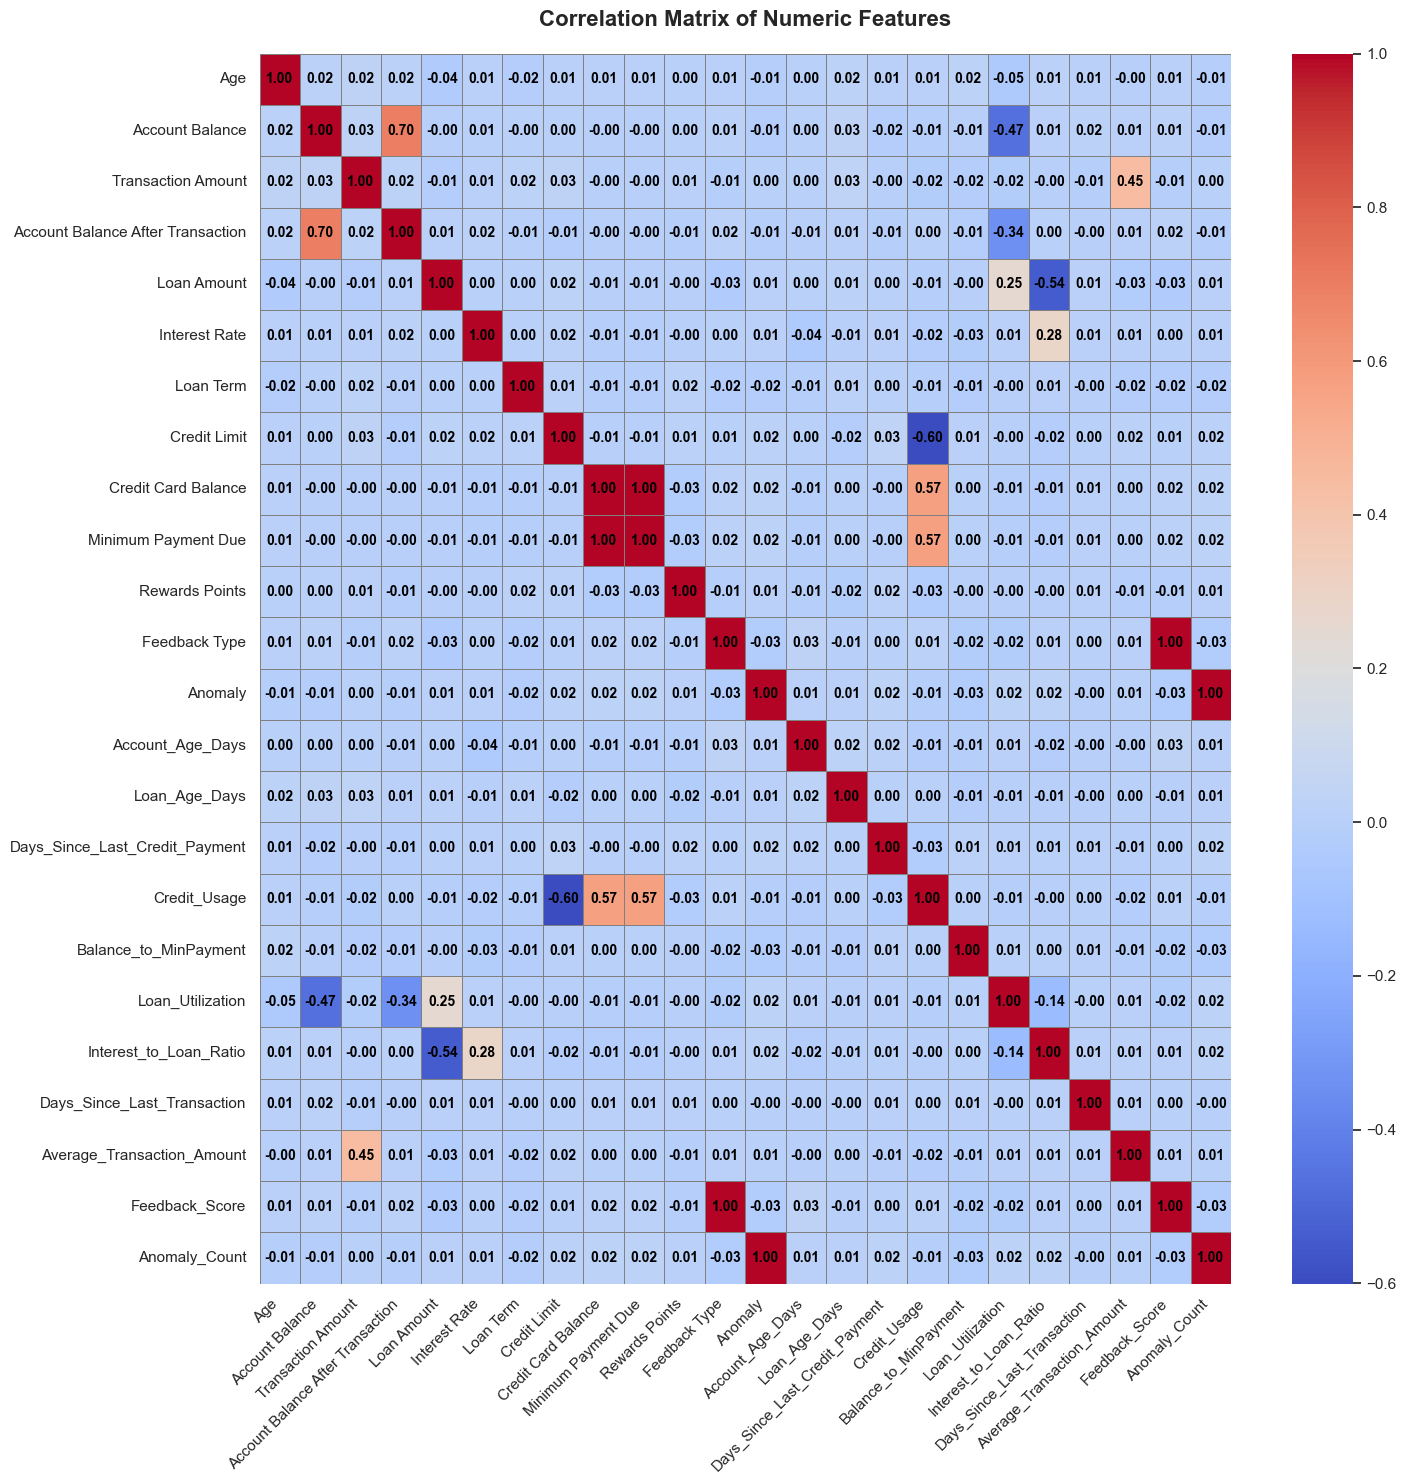

In [14]:
#correlation
sns.set_theme(style="white")  

plt.figure(figsize=(15,15))
corr=data.select_dtypes(include=[int,float]).corr()

sns.heatmap(
    corr,
    annot=True,           
    fmt=".2f",           
    cmap="coolwarm",    
    cbar=True,            
    linewidths=0.5,       
    linecolor='gray',     
    annot_kws={"size":10, "weight":"bold", "color":"black"} 
)


plt.title("Correlation Matrix of Numeric Features", fontsize=16, fontweight='bold', pad=20)


plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()


C:\Users\AZARAKHSH\AppData\Local\Temp\ipykernel_15076\1902929307.py:11: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(


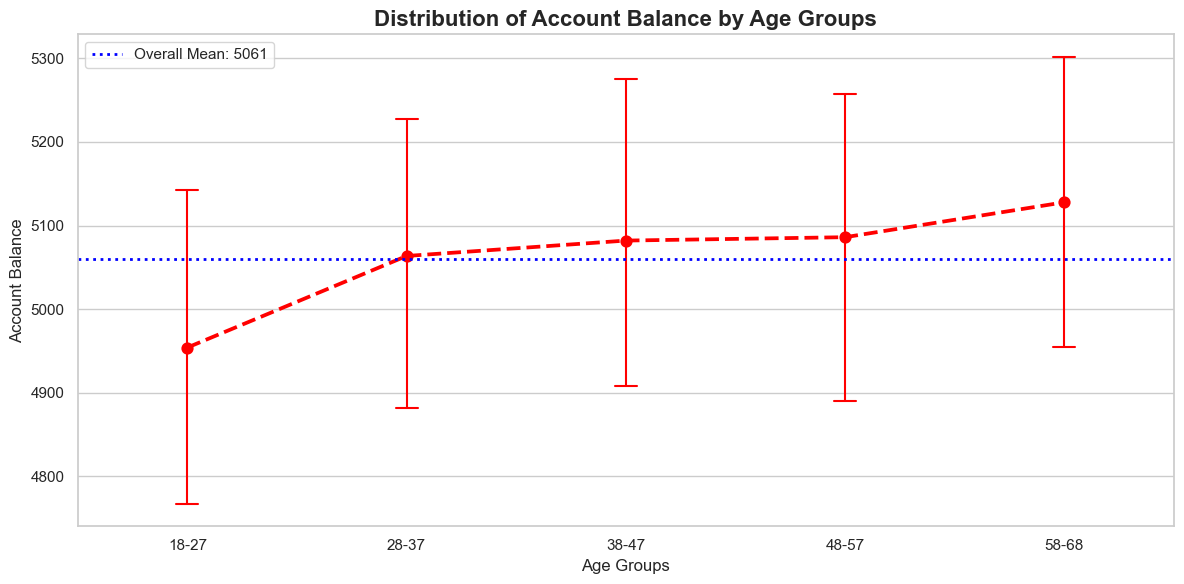

 Descriptive Statistics for Age:
count    5000.000000
mean       43.469800
std        15.145672
min        18.000000
25%        30.000000
50%        43.000000
75%        57.000000
max        69.000000
Name: Age, dtype: float64

 Descriptive Statistics for Account Balance:
count    5000.000000
mean     5060.570918
std      2849.356481
min       107.200000
25%      2582.777500
50%      5075.500000
75%      7509.760000
max      9998.110000
Name: Account Balance, dtype: float64


In [15]:
#Distribution of account balance by age group
data['age_groups'] = pd.cut(
    data['Age'],
    bins=[18, 28, 38, 48, 58, 69],
    right=False,
    labels=['18-27', '28-37', '38-47', '48-57', '58-68']
)
sns.set_theme(style="whitegrid", palette="deep")
plt.figure(figsize=(12, 6))

sns.pointplot(
    data=data,
    x='age_groups',
    y='Account Balance',
    color="red",
    markers="o",
    linestyles="--",
    capsize=0.1,
    errwidth=1.5
)
mean_balance = data['Account Balance'].mean()
plt.axhline(mean_balance, color="blue", linestyle=":", linewidth=2, label=f'Overall Mean: {mean_balance:.0f}')
 
plt.title("Distribution of Account Balance by Age Groups", fontsize=16, weight='bold')
plt.xlabel("Age Groups", fontsize=12)
plt.ylabel("Account Balance", fontsize=12)
plt.legend()
plt.tight_layout()

plt.show()
 
print(" Descriptive Statistics for Age:")
print(data['Age'].describe())
print("\n Descriptive Statistics for Account Balance:")
print(data['Account Balance'].describe())


Text(0, 0.5, 'Account Balance')

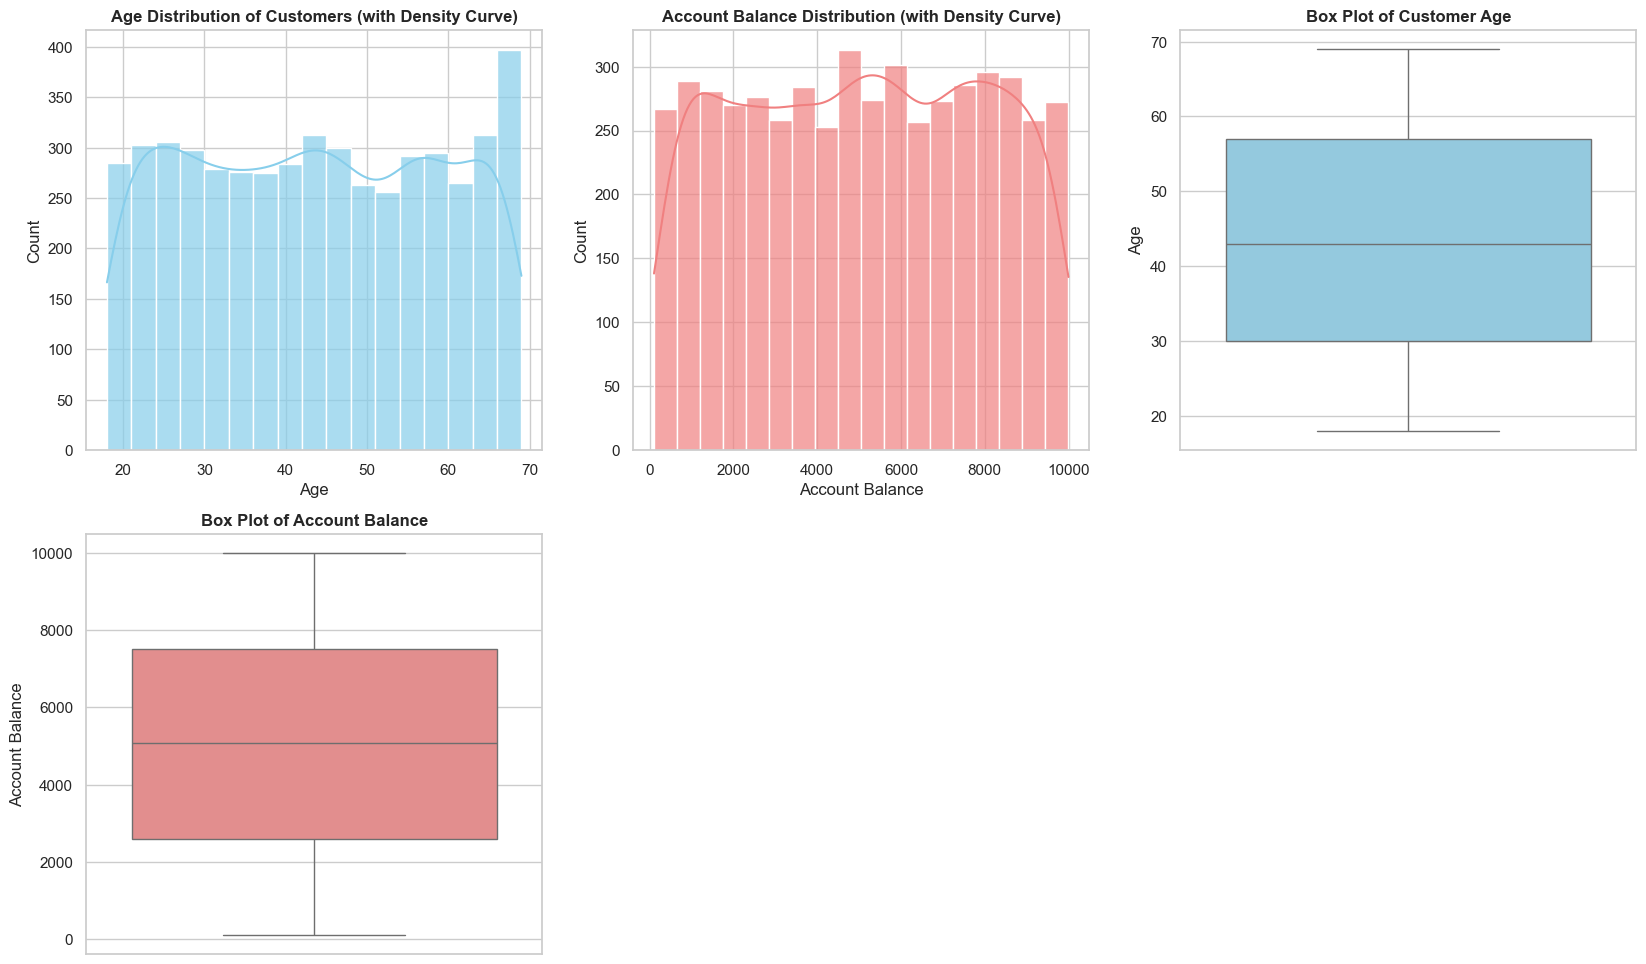

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.histplot(data['Age'], kde=True, color='skyblue', alpha=0.7)
plt.title('Age Distribution of Customers (with Density Curve)', fontsize=12, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
sns.histplot(data['Account Balance'], kde=True, color='lightcoral', alpha=0.7)
plt.title('Account Balance Distribution (with Density Curve)', fontsize=12, fontweight='bold')
plt.xlabel('Account Balance')
plt.ylabel('Count')

plt.subplot(2, 3, 3)
sns.boxplot(y=data['Age'], color='skyblue')
plt.title('Box Plot of Customer Age', fontsize=12, fontweight='bold')
plt.ylabel('Age')
 
plt.subplot(2, 3, 4)
sns.boxplot(y=data['Account Balance'], color='lightcoral')
plt.title('Box Plot of Account Balance', fontsize=12, fontweight='bold')
plt.ylabel('Account Balance')

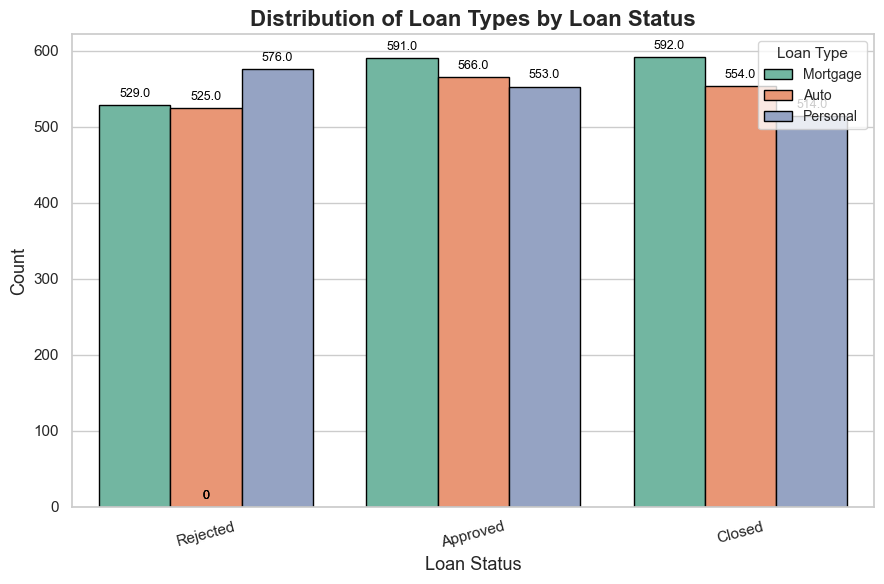

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(9,6))
ax = sns.countplot(
    data=data,
    x='Loan Status',
    hue='Loan Type',
    palette="Set2",    
)

 
plt.title("Distribution of Loan Types by Loan Status", fontsize=16, fontweight='bold')
plt.xlabel("Loan Status", fontsize=13)
plt.ylabel("Count", fontsize=13)

plt.xticks(rotation=15, fontsize=11)
plt.yticks(fontsize=11)


for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=9, color='black'
    )

plt.legend(title="Loan Type", loc="upper right", fontsize=10, title_fontsize=11, frameon=True)

plt.tight_layout()
plt.show()


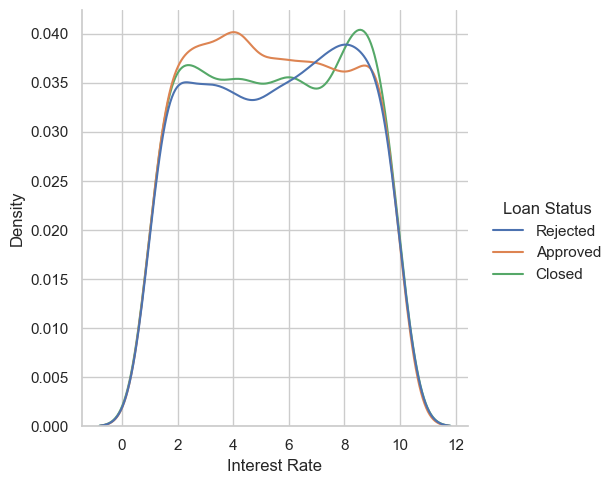

In [16]:
#Distribution interest rate by loan status
plt.Figure(figsize=(7,7))
sns.displot(data,x='Interest Rate',hue='Loan Status',kind='kde')
plt.show()

clasification

In [76]:
data.select_dtypes(include=object)

,Gender,Account Type,Transaction Type,Loan Type,Loan Status,Card Type,Resolution Status
0,Male,Current,Withdrawal,Mortgage,Rejected,AMEX,Resolved
1,Female,Current,Deposit,Auto,Approved,MasterCard,Resolved
2,Female,Current,Deposit,Auto,Closed,AMEX,Pending
3,Other,Savings,Withdrawal,Personal,Approved,MasterCard,Resolved
4,Other,Savings,Transfer,Mortgage,Approved,Visa,Resolved
...,...,...,...,...,...,...,...
4995,Other,Savings,Withdrawal,Auto,Rejected,AMEX,Pending
4996,Female,Savings,Deposit,Auto,Closed,MasterCard,Pending
4997,Female,Current,Withdrawal,Auto,Rejected,MasterCard,Resolved
4998,Female,Current,Deposit,Mortgage,Rejected,Visa,Pending


In [77]:
#Encoding
encoder = LabelEncoder()
columns_to_encode = ['Gender', 'Account Type', 'Transaction Type', 'Loan Type', 
                     'Loan Status', 'Card Type', 'Resolution Status','Age_Group']
for col in columns_to_encode:
    data[col] = encoder.fit_transform(data[col])


In [78]:
#Feature selection
X = data.drop(columns=['Anomaly'],axis=1)

Y=data['Anomaly']

In [79]:
#Matual information
mi_scores = mutual_info_classif(X, Y, discrete_features='auto', random_state=42)


mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

print(mi_scores_df)


                              Feature  MI_Score
30                      Anomaly_Count  0.228268
20                      Loan_Age_Days  0.006302
13                       Credit Limit  0.004977
22                       Credit_Usage  0.004204
4                    Transaction Type  0.003564
17                      Feedback Type  0.003300
19                   Account_Age_Days  0.002727
0                                 Age  0.002701
9                       Interest Rate  0.001930
2                        Account Type  0.001462
21     Days_Since_Last_Credit_Payment  0.001136
12                          Card Type  0.000837
10                          Loan Term  0.000743
24                   Loan_Utilization  0.000068
6   Account Balance After Transaction  0.000000
14                Credit Card Balance  0.000000
11                        Loan Status  0.000000
8                           Loan Type  0.000000
7                         Loan Amount  0.000000
1                              Gender  0

In [80]:
x=data[['Anomaly_Count','Account Type','Credit Limit','Interest Rate','Loan_Age_Days','Age_Group','Age','Feedback_Score','Account_Age_Days']]

In [81]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(
    x, Y, test_size=0.3, random_state=42, shuffle=True)

In [82]:
#Standardization

sc=StandardScaler()

X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)


In [83]:
#Dimensionality reduction

pca = PCA(n_components=0.95)


total_xtrain = pca.fit_transform(X_train_sc)
total_xtest = pca.transform(X_test_sc)


print("Number of selected components:", pca.n_components_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))


Number of selected components: 8
Total explained variance: 0.9937013599024079


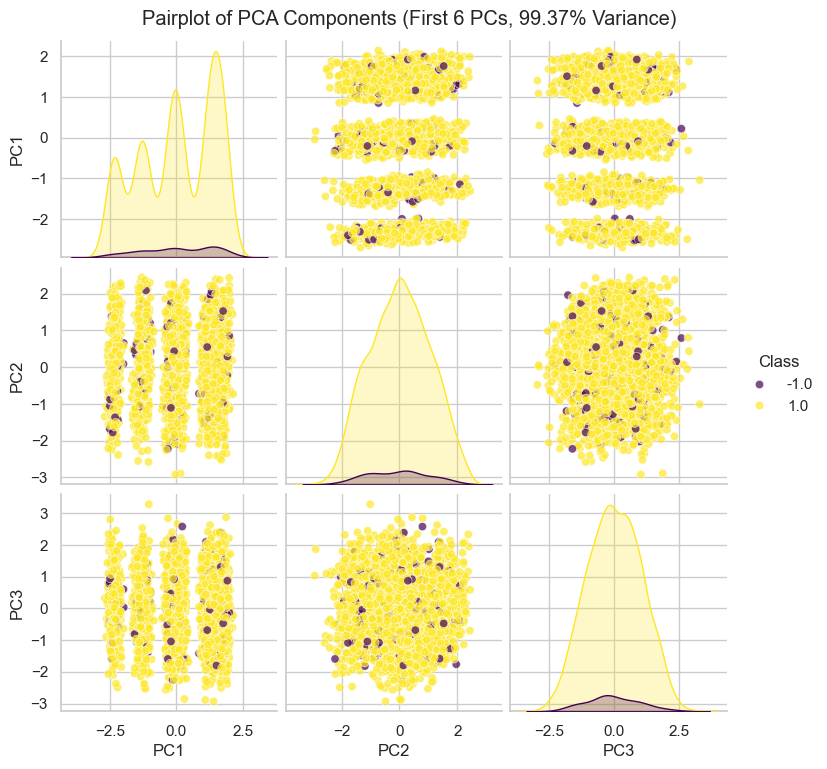

In [40]:
#Visualization for PCA

n_components = pca.n_components_  
columns = [f'PC{i+1}' for i in range(min(n_components, 3))]  
data = pd.DataFrame(total_xtrain[:, :min(n_components, 3)], columns=columns)
data['Class'] = y_train

sns.pairplot(data, hue='Class', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle(f"Pairplot of PCA Components (First {min(n_components, 6)} PCs, {sum(pca.explained_variance_ratio_):.2%} Variance)", y=1.02)
plt.show()

In [41]:
#randon forest modle
rfc=RandomForestClassifier(class_weight='balanced',random_state=42,max_depth=3)
rfc.fit(total_xtrain, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
y_pred_test = rfc.predict(total_xtest)

In [43]:
y_pred_train = rfc.predict(total_xtrain)

In [44]:
#Validate on test data

print(f'accuracy_score: {accuracy_score(y_test, y_pred_test)}')
print(f'precision_score:{precision_score(y_test, y_pred_test)}')
print(f'recall_score: {recall_score(y_test, y_pred_test)}')
print(f'f1_score: {f1_score(y_test, y_pred_test)}')
cm = confusion_matrix(y_test, y_pred_test)

accuracy_score: 1.0
precision_score:1.0
recall_score: 1.0
f1_score: 1.0


In [45]:
#Validate on train data

print(f'accuracy_score: {accuracy_score(y_train, y_pred_train)}')
print(f'precision_score:{precision_score(y_train, y_pred_train)}')
print(f'recall_score: {recall_score(y_train, y_pred_train)}')
print(f'f1_score: {f1_score(y_train, y_pred_train)}')
cm = confusion_matrix(y_train, y_pred_train)

accuracy_score: 1.0
precision_score:1.0
recall_score: 1.0
f1_score: 1.0


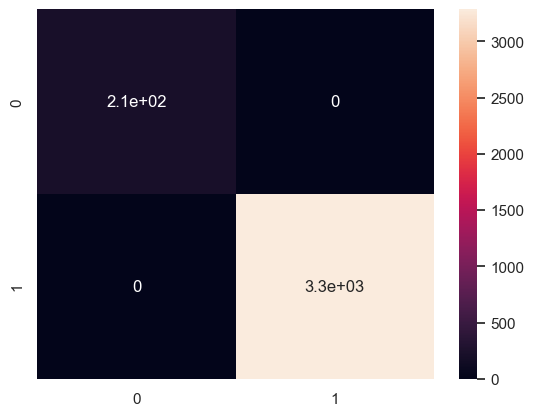

In [46]:
#Confiotion matrix
sns.heatmap(cm,annot=True)
plt.show()

In [47]:
# K fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rfc, x, Y, cv=kfold, scoring='accuracy')


print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Accuracy scores for each fold: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation: 0.0


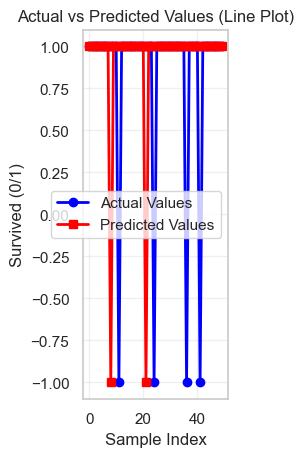

In [51]:
#Visualize the outputs

plt.subplot(1, 3, 1)
sample_range = range(50)  # First 50 samples
plt.plot(sample_range, y_test.values[:50], label='Actual Values', marker='o', color='blue', linewidth=2)
plt.plot(sample_range, Y[:50], label='Predicted Values', marker='s', color='red', linewidth=2)
plt.title('Actual vs Predicted Values (Line Plot)')
plt.xlabel('Sample Index')
plt.ylabel('Survived (0/1)')
plt.legend()
plt.grid(True, alpha=0.3)

In [52]:
#suport verctor machine modle
svm = SVC(kernel='rbf', C=2.0, random_state=42)
svm.fit(X_train,y_train)

,C,2.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [53]:
y_pred = svm.predict(X_test)

In [ ]:
#Validate on test data
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'precision_score:{precision_score(y_test, y_pred, zero_division=0)}')
print(f'recall_score: {recall_score(y_test, y_pred, zero_division=0)}')
print(f'f1_score: {f1_score(y_test, y_pred, zero_division=0)}')
cm = confusion_matrix(y_test, y_pred)

accuracy_score: 0.9426666666666667
precision_score:0.9426666666666667
recall_score: 1.0
f1_score: 0.970487302676733


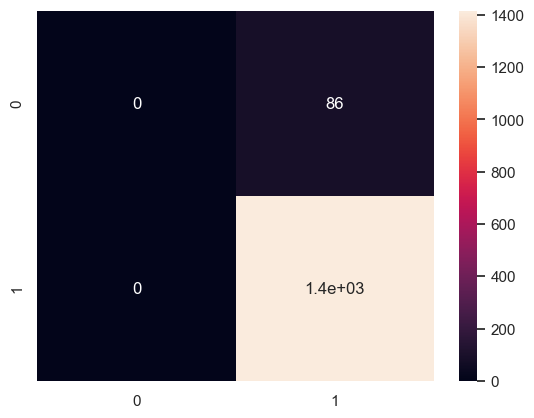

In [55]:
#Confiotion matrix

sns.heatmap(cm,annot=True)
plt.show()

In [56]:
#Balance data with SMOTE

print( "Before SMOTE:", Counter(Y))


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


print(" aAfter SMOTE:", Counter(y_train_res))


Before SMOTE: Counter({1: 4700, -1: 300})
 aAfter SMOTE: Counter({1: 3286, -1: 3286})


In [ ]:
#Optimize SVM

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],                 
    'gamma': ['scale', 'auto', 0.01, 0.1, 1], 
    'kernel': ['linear', 'rbf', 'poly'] 
    
}

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',   
    verbose=2,
    n_jobs=-1
)


grid_search.fit(X_train_res, y_train_res)


print("Best Parameters:", grid_search.best_params_)


best_svm = grid_search.best_estimator_


y_pred = best_svm.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        86
           1       1.00      1.00      1.00      1414

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



clustring

In [84]:
data.columns

Index(['Age', 'Gender', 'Account Type', 'Account Balance', 'Transaction Type',
       'Transaction Amount', 'Account Balance After Transaction',
       'Loan Amount', 'Loan Type', 'Interest Rate', 'Loan Term', 'Loan Status',
       'Card Type', 'Credit Limit', 'Credit Card Balance',
       'Minimum Payment Due', 'Rewards Points', 'Feedback Type',
       'Resolution Status', 'Anomaly', 'Account_Age_Days', 'Loan_Age_Days',
       'Days_Since_Last_Credit_Payment', 'Credit_Usage',
       'Balance_to_MinPayment', 'Loan_Utilization', 'Interest_to_Loan_Ratio',
       'Age_Group', 'Days_Since_Last_Transaction',
       'Average_Transaction_Amount', 'Feedback_Score', 'Anomaly_Count'],
      dtype='object')

In [86]:
# select numerical feature
numerical_features = ['Age', 'Gender', 'Account Type', 'Account Balance', 'Transaction Type',
       'Transaction Amount', 'Account Balance After Transaction',
       'Loan Amount', 'Loan Type', 'Interest Rate', 'Loan Term', 'Loan Status',
       'Card Type', 'Credit Limit', 'Credit Card Balance',
       'Minimum Payment Due', 'Rewards Points', 'Feedback Type',
       'Resolution Status', 'Anomaly', 'Account_Age_Days', 'Loan_Age_Days',
       'Days_Since_Last_Credit_Payment', 'Credit_Usage',
       'Balance_to_MinPayment', 'Loan_Utilization', 'Interest_to_Loan_Ratio',
       'Age_Group', 'Days_Since_Last_Transaction',
       'Average_Transaction_Amount', 'Feedback_Score', 'Anomaly_Count']

available_numerical = [col for col in numerical_features if col in data.columns]
print(f"Numerical features available: {available_numerical}")

data_numerical = data[available_numerical].copy()


Numerical features available: ['Age', 'Gender', 'Account Type', 'Account Balance', 'Transaction Type', 'Transaction Amount', 'Account Balance After Transaction', 'Loan Amount', 'Loan Type', 'Interest Rate', 'Loan Term', 'Loan Status', 'Card Type', 'Credit Limit', 'Credit Card Balance', 'Minimum Payment Due', 'Rewards Points', 'Feedback Type', 'Resolution Status', 'Anomaly', 'Account_Age_Days', 'Loan_Age_Days', 'Days_Since_Last_Credit_Payment', 'Credit_Usage', 'Balance_to_MinPayment', 'Loan_Utilization', 'Interest_to_Loan_Ratio', 'Age_Group', 'Days_Since_Last_Transaction', 'Average_Transaction_Amount', 'Feedback_Score', 'Anomaly_Count']


In [87]:
X_scaled = sc.fit_transform(data_numerical)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Total explained variance:", sum(pca.explained_variance_ratio_))


Total explained variance: 0.1462403077929652


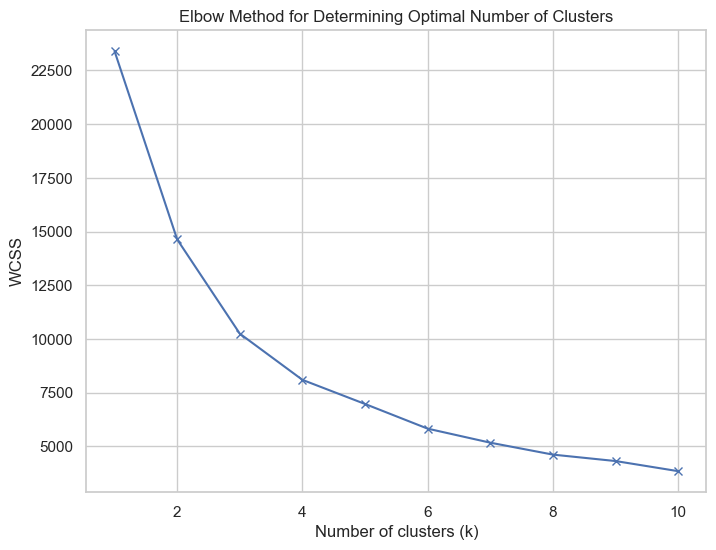

In [88]:
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.grid(True)
plt.show()



In [89]:
kmeans = KMeans(n_clusters=3, random_state=0,init='k-means++',n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)


In [90]:
data_with_clusters = data.loc[data_numerical.index].copy()
data_with_clusters['Cluster'] = y_kmeans

print(f"Cluster distribution:")
print(data_with_clusters['Cluster'].value_counts().sort_index())
data_with_clusters = data.loc[data_numerical.index].copy()
data_with_clusters['Cluster'] = y_kmeans

print(f"Cluster distribution:")
print(data_with_clusters['Cluster'].value_counts().sort_index())

Cluster distribution:
Cluster
0    1450
1    1823
2    1727
Name: count, dtype: int64
Cluster distribution:
Cluster
0    1450
1    1823
2    1727
Name: count, dtype: int64


In [91]:
cluster_analysis = data_with_clusters.groupby('Cluster')[available_numerical].agg(['mean', 'std'])
print("\n=== Feature Analysis for Each Cluster ===")
print(cluster_analysis)


=== Feature Analysis for Each Cluster ===
               Age               Gender           Account Type            \
              mean        std      mean       std         mean       std   
Cluster                                                                    
0        36.891034  14.046133  1.020000  0.820047     0.447586  0.497417   
1        44.934174  14.940425  0.966539  0.821954     0.534284  0.498960   
2        47.447597  14.445266  0.967574  0.818452     0.511870  0.500004   

        Account Balance              Transaction Type            ...  \
                   mean          std             mean       std  ...   
Cluster                                                          ...   
0           3045.145269  2311.565183         0.964828  0.815315  ...   
1           5390.905776  2682.242205         1.020296  0.822385  ...   
2           6404.037475  2469.923997         0.993631  0.824358  ...   

        Age_Group           Days_Since_Last_Transaction            

In [ ]:
# Save analysis results to Excel file
with pd.ExcelWriter('cluster_analysis_results.xlsx') as writer:
    # Sheet 1: Original data with clusters
    data_with_clusters.to_excel(writer, sheet_name='Data_with_Clusters', index=False)
    
    # Sheet 2: Statistical analysis of clusters
    cluster_analysis.to_excel(writer, sheet_name='Cluster_Statistics')
    
    # Sheet 3: PCA summary
    pca_summary = pd.DataFrame({
        'Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
        'Explained_Variance_Ratio': pca.explained_variance_ratio_,
        'Cumulative_Explained_Variance': np.cumsum(pca.explained_variance_ratio_)
    })
    pca_summary.to_excel(writer, sheet_name='PCA_Summary', index=False)
    
    # Sheet 4: Cluster centers
    cluster_centers = pd.DataFrame(
        kmeans.cluster_centers_,
        columns=[f'PC1', f'PC2'],
        index=[f'Cluster_{i}' for i in range(kmeans.n_clusters)]
    )
    cluster_centers.to_excel(writer, sheet_name='Cluster_Centers')

print("\nResults saved to 'cluster_analysis_results.xlsx'")

# Also save to CSV files
data_with_clusters.to_csv('data_with_clusters.csv', index=False)
cluster_analysis.to_csv('cluster_statistics.csv')

print("CSV files also saved:")
print("- data_with_clusters.csv")
print("- cluster_statistics.csv")


Results saved to 'cluster_analysis_results.xlsx'
CSV files also saved:
- data_with_clusters.csv
- cluster_statistics.csv


C:\Users\AZARAKHSH\AppData\Local\Temp\ipykernel_15076\1505260275.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1],


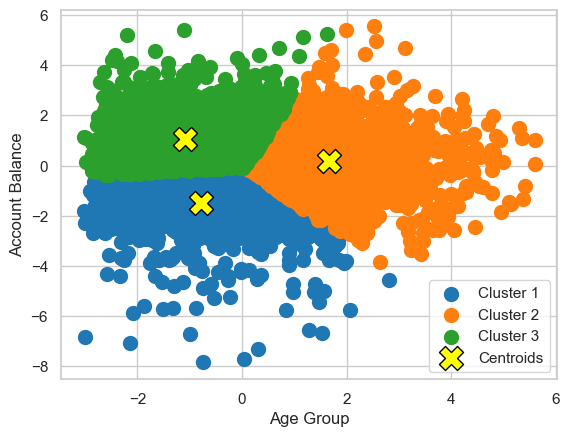

In [92]:
n_clusters =kmeans.n_clusters 
colors = plt.cm.tab10.colors[:n_clusters]  

for i in range(n_clusters):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', edgecolor='black', marker='X', label='Centroids')

plt.xlabel("Age Group")
plt.ylabel("Account Balance")
plt.legend()
plt.show()


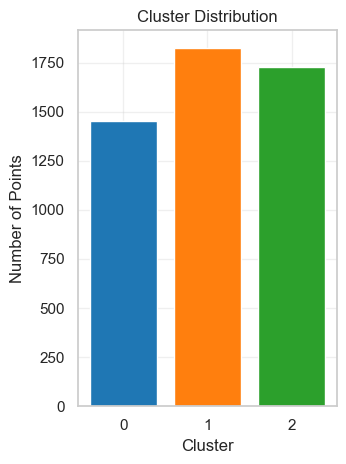

In [93]:
plt.subplot(1, 2, 2)
cluster_counts = data_with_clusters['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color=colors[:len(cluster_counts)])
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('Cluster Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.show()